### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [4]:
#Импортируем библитеки, необходимые для анализа
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [5]:
#Читаем данные  из  файлов и сохраняем их в датафреймы
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)
except:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [6]:
#выведем основную информацию о датафреймах с помощью метода info()
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Можно заметить, что столбцы в датафреймах имеют разный регистр написания, для удобства работы с данными приведем все названия столбцов к нижнему регистру методом str.lower()

Также названия некоторых столбцов содержат пробелы, что неправильно с точки зрения стиля написания кода, переименуем эти столбцы методом rename(): 

In [7]:
#меняем регистр написания столбцов
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

#переименовываем "неправильные" названия столбцов
visits.rename(columns = {'user id':'user_id','session start': 'session_start', 'session end':'session_end'}, inplace = True)
orders.rename(columns = {'user id':'user_id','event dt':'event_dt'}, inplace = True)

In [8]:
#проверим полученный результат
display(visits.head(3),orders.head(3),costs.head(3))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


В каждом датафрейме имеются столбцы с датами - сессий, заказов, проведения рекламных компаний. Эти столбцы имеют формат 'object', для работы с этими данными необходимо перевести их  в формат даты ('datetime64') методом pd.to_datetime:

In [9]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Теперь проверим датафреймы на наличие в них  пропусков и полных дубликатов. Для этого используем методы duplicated() и isnull():

In [11]:
#проверим наличие полных  дубликатов в каждом датафрейме, посчитаем количество таких строк методом len()
display(len(visits[visits.duplicated()]))
display(len(orders[orders.duplicated()]))
len(costs[costs.duplicated()])
#полных дубликатов нет

0

0

0

In [12]:
#проверим наличие пропущенных данныхв каждом датафрейме, посчитаем количество таких ячеек методом sum()
display(visits.isnull().sum())
display(orders.isnull().sum())
visits.isnull().sum()
#пропусков нет

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

# Функция для создания пользовательских профилей

In [13]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

# Функция для расчёта удержания

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

# Функция для расчёта конверсии

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# Функция для расчёта LTV и ROI

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

# А также зададим функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Для составвления профилей пользователей вызовем функцию get_profiles() и передадим ей данные о посещениях, покупках и тратах на рекламу, для определения минимальной и максимальной даты привлечения пользователей выведем минимальное и максимальное значение столбца с датой начала сессии:**

In [21]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
#минимальная дата привлечения пользователей
min_date = profiles['dt'].min()
#максимальная дата привлечения пользователей
max_date = profiles['dt'].max()
display(min_date, max_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей - 1 мая 2019 года,  максимальная - 27 октября 2019 года

**Построим таблицу, отражающую количество пользователей приложения в каждой стране и долю платящих из каждой страны. Для этого Посчитаем отдельно количество пользователей из  каждой страны, далее количество платящих пользователей и поделим это число на общее количество пользователей, выразим результат в процентах и округлим. Итоговую  таблицу отсортируем по количеству платящих пользователей, т.к. они интересуют нас в большей степени:**

In [22]:
#Общее количество пользователей по странам
country_clients = profiles.groupby(['region']).agg({'user_id': 'nunique'})
#Количество только платящих пользователей по странам
country_payers = profiles.loc[profiles['payer'] == True].groupby(['region', 'payer']).agg({'user_id': 'nunique'})
#Объединим эти 2 таблицы в одну по одинаковому признаку - по стране, переименуем столбцы для удобства, отсортируем количество пользователей по убыванию
country_clients = (country_clients.merge(country_payers, on ='region', how='left')
.rename(columns={'user_id_x': 'users_total', 'user_id_y': 'users_rich'})
.sort_values(by = 'users_rich', ascending = False))
#Добавим новый столбец, отражающий долю платящих пользователей в каждой стране , в процентах
country_clients['part_%'] = round(country_clients['users_rich'] / country_clients['users_total'] * 100, 2)
#Изучим результат
country_clients


,users_total,users_rich,part_%
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


Пользователи приходят в приложение из четырех стран: United States, UK, France, Germany.

Больше всего пользователей зарегистрировано в США (100002 чел.), в этой же стране и наибольшее количество (6902 чел.) и доля платящих пользователей (6,9 % от общего числа)

На втором месте по общему количеству пользователей (17575 чел.) и количеству платящих пользователей (700 чел.) находится Великобритания, однако по доле платящих пользователей она занимает 3-е место с результатом 3,98 %.

Похожее количество пользователей во Франции (17450 чел.), однако засчет меньшего количества платящих пользователей (663 чел.) их относительная доля составляет 3,8 %, что является худших результатом

На последнем месте по общему количеству пользователей (14981 чел.) и количеству платящих пользователей (616 чел.) находится Германия, однако по доле платящих пользователей она занимает 2-е место с результатом 4,11 %.

**Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства по аналогии с предыдущим заданием:**

In [23]:
#Общее количество пользователей по типу устройства
device_clients = profiles.groupby(['device']).agg({'user_id': 'nunique'})
#Количество только платящих пользователей с разбивкой по устройствам
device_payers = profiles.loc[profiles['payer'] == True].groupby(['device', 'payer']).agg({'user_id': 'nunique'})
#Объединим эти 2 таблицы в одну по одинаковому признаку - по устройству, переименуем столбцы для удобства, отсортируем количество пользователей по убыванию
device_clients = (device_clients.merge(device_payers, on ='device', how='left')
.rename(columns={'user_id_x': 'users_total', 'user_id_y': 'users_rich'})
.sort_values(by = 'users_rich', ascending = False))
#Добавим новый столбец, отражающий долю в процентах платящих пользователей каждого устройства 
device_clients['part_%'] = round(device_clients['users_rich'] / device_clients['users_total'] * 100, 2)
#Изучим результат
device_clients

,users_total,users_rich,part_%
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05


Пользователи используют 4 типа устройств: iPhone, Android, PC, Mac.

Большиство платящих пользователей предпочитают устройства компании Aplle  - это устройства iPhone (общее количество пользователей 54479 чел и доля платящих 6,21%) и Mac (общее количество пользователей 30042 чел и доля платящих 6,36%), то есть пользователи этих устройств чаще остальных оплачивают подписку приложения Procrastinate Pro+. Владельцы айфонов также являются лидерами по общему количеству пользователей приложения.

Владельцы Android и PC имеют относительно худшие показатели платежеспособности  - при общем поличестве пользователей 35032 чел и 30455 чел они имеют доли платящих клиентов на уровне 5,85% и 5,05% соответсвенно.

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения по аналогии:**

In [24]:
#Общее количество пользователей по каналам привлечения
channel_clients = profiles.groupby(['channel']).agg({'user_id': 'nunique'})
#Количество только платящих пользователей с разбивкой по каналам привлечения
channel_payers = profiles.loc[profiles['payer'] == True].groupby(['channel', 'payer']).agg({'user_id': 'nunique'})
#Объединим эти 2 таблицы в одну по одинаковому признаку - по каналу привлечения, переименуем столбцы для удобства, отсортируем количество пользователей по убыванию
channel_clients = (channel_clients.merge(channel_payers, on ='channel', how='left')
.rename(columns={'user_id_x': 'users_total', 'user_id_y': 'users_rich'})
.sort_values(by = ['users_rich'], ascending = False))
#Добавим новый столбец, отражающий долю платящих пользователей по каждому каналу привлечения
channel_clients['part_%'] = round(channel_clients['users_rich'] / channel_clients['users_total'] * 100, 2)
#Изучим результат
channel_clients

,users_total,users_rich,part_%
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


Для начала проанализируем рекламные каналы, которые привлекли большее количество платящих пользователей в абсолютных цифрах. Здесь выделяется ТОП-3 канала:
- FaceBoom - 3557 человек;
- Tip Top - 1878 человек;
- organic - 1160 человек.
Канал organic можно назвать условно рекламным, т.к. по этому каналу приходят "бесплатные" для компании пользователи, которые сами нашли и скачали приложение, и на привлечение которые компания не тратит средства. 
Каналы, не входящие в ТОП-3, привлекают более чем в 2 раза меньше пользователей в среднем.

**Однако, когда мы говорим о рекламных каналах привлечения, то помимо абсолютных показателей количества платящих пользователей, важно изучить и относительные показатели эффективности, как, например, доля платящих пользователей относительно общего числа**. Для этого взглянем на ту же таблицу, но отсортируем ее по убыванию  покателя  part_%:

In [25]:
channel_clients.sort_values(by = ['part_%'], ascending = False)

,users_total,users_rich,part_%
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


Здесь можно выделить уже ТОП-7 рекламных каналов, которые лучше себя показали в плане привлечения платежеспособных пользователей:
- FaceBoom 12.20%
- AdNonSense	11.34%
- lambdaMediaAds	10.47%
- TipTop	9.60%
- RocketSuperAds	7.91%
- WahooNetBanner	5.30%

**Особенно выделяется канал FaceBoom - он является лидером как по абсолютному показателю платящих пользователей,  так и по относительному. На основе текущих данных можно назвать его лучшим каналом привлечения платящих пользователей в исследуемом периоде**. Также неплохие результаты показывает канал TipTop. Так ли это на самом деле, проверим далее. 

Остальные рекламные каналы привлекают меньшее общее количество пользователей, но эти пользователи охотнее переходят в разряд платящих, что важно для компании.
А вот "органические" пользователи при максимальном общем количестве пользователей имеют худший показатель платежеспособности,  на что также следует обратить внимание.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Чтобы посчитать общую сумму расходов на маркетинг, достаточно найту сумму затрат на каждую рекламную компанию, эту информацию хранит столбец 'costs' датафрейма с аналогичным названием**

In [26]:
# всего потрачено 105497.3 у.е.
costs['costs'].sum()

105497.30000000002

**Чтобы выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник, сгруппируем датафрейм costs по каналам привлечения сhannel и сложим затраты по каждому каналу:**

In [27]:
costs.groupby(['channel']).agg({'costs': 'sum'}).sort_values(by = ['costs'], ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего маркетинговых затрат приходится на 2 канала - Tip Top (54751.30 у.е.) и FaceBoom (32445.60) , что в сумме составляет 87196.9 у.е. или 82,65% всего рекламного бюджета.  На остальные  каналы тратится в разы меньше средств.

**Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Для этого сначала создадим столбец с неделями, а затем построим график изменения рекламных расходов по месяцам и неделям**

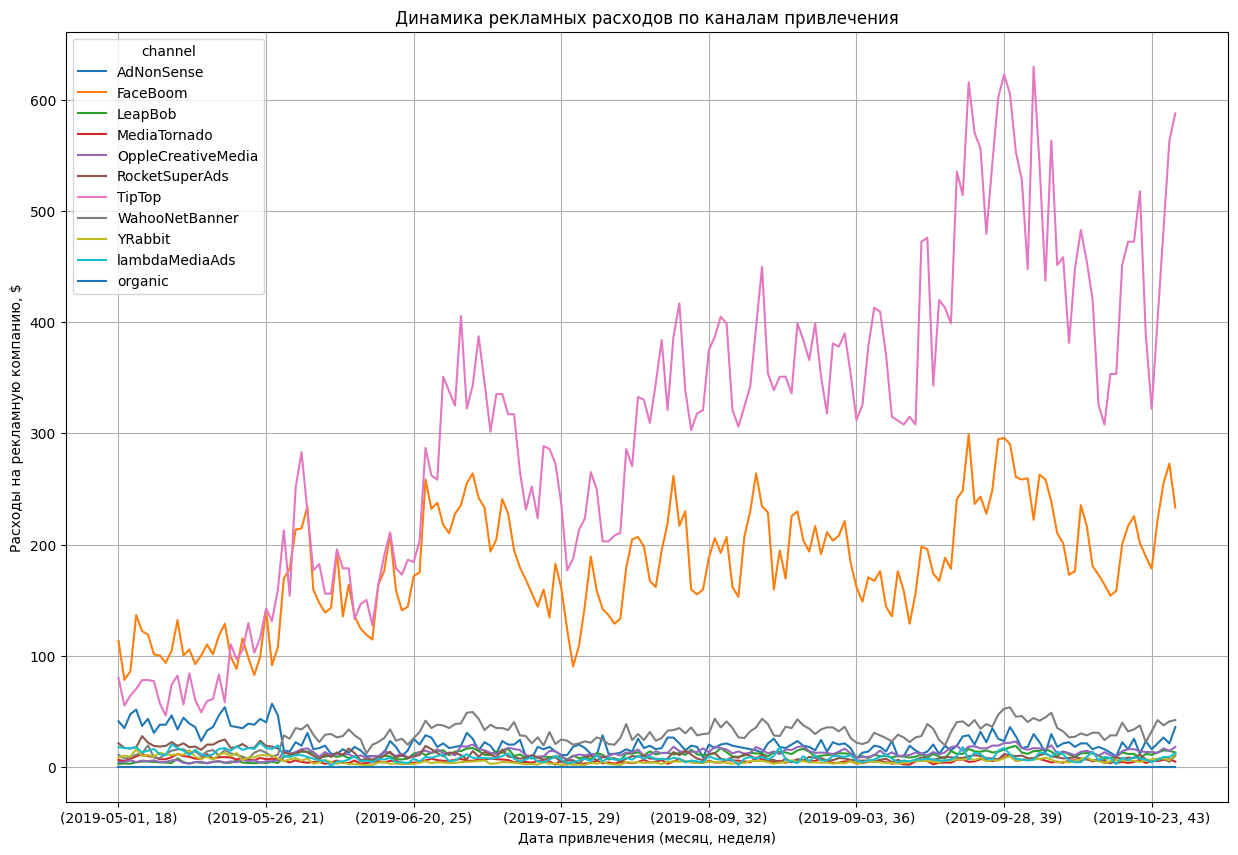

In [28]:
#создаем столбец с неделями
profiles['week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week
#создаем сводную таблицу с нужными данными и строим по ним график методом plot()
profiles.pivot_table(
    index=['dt','week'],  # даты
    columns='channel',  # источники переходов
    values='acquisition_cost',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)
plt.ylabel('Расходы на рекламную компанию, $')
plt.xlabel('Дата привлечения (месяц, неделя)')
plt.title('Динамика рекламных расходов по каналам привлечения')
plt.show()

Согласно данным графика, больше всего расходов приходится на каналы Tip Top и FaceBoom, расходы на каждый из этих каналов увеличиваются с течением времени , по остальным каналам такой динамики не наблюдается, также ее сложно проследить,  т.к. данные по этим каналам "сливаются",  поэтому построим график без учета лидеров по затратам:

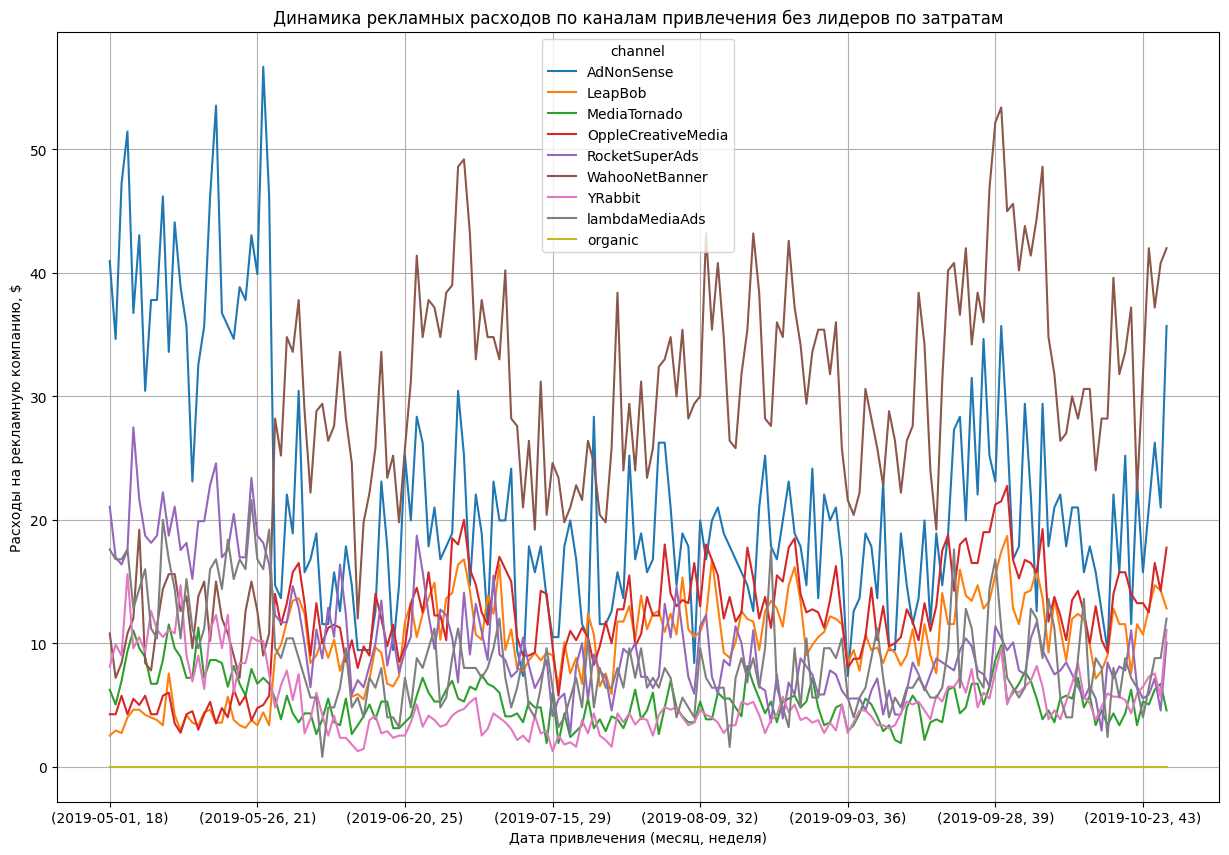

In [29]:
#создадим временный датафрейм,  исключив из него лидеров по затратам
profiles_without_leaders = profiles[(profiles.channel != 'FaceBoom') & (profiles.channel != 'TipTop')]
profiles_without_leaders.pivot_table(
    index=['dt','week'],  # даты
    columns='channel',  # источники переходов
    values='acquisition_cost',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)
plt.ylabel('Расходы на рекламную компанию, $')
plt.xlabel('Дата привлечения (месяц, неделя)')
plt.title('Динамика рекламных расходов по каналам привлечения без лидеров по затратам')
plt.show()

По данным графикам  можно сделать вывод,  что расходы на большиство рекламных каналов не превышают 30 долларов в месяц и с течением времени сильно не меняются. Выделяются только каналы AdNonSense (затраты на него снизились с 50 долл. в мае до 35 долл. в октябре) и WahooNetBanner (затраты на него выросли в среднем  с 20 долл. в мае до 40 долл. в октябре с пиковыми значениями в июне и сентябре на уровне 50 долл.) Однако относительно лидеров по затратам данные изменения не столь значительны.

**Чтобы узнать,  сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC,который хранится в столбце 'acquisition_cost', и построим по ней график истории изменений**

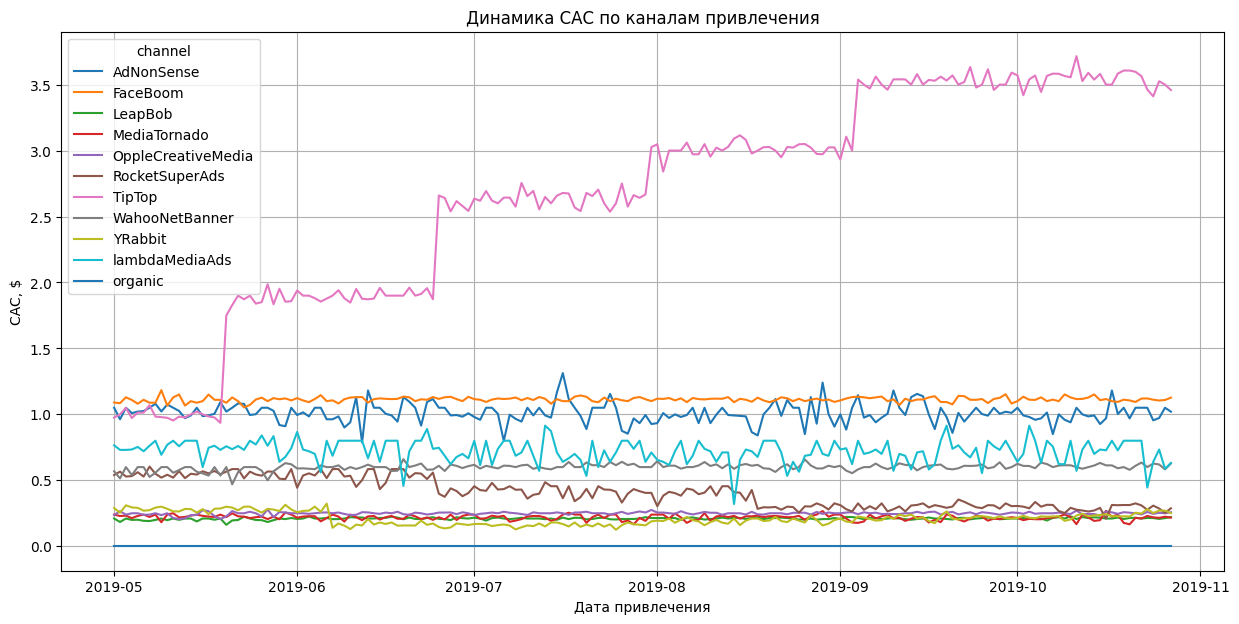

In [30]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Большиство каналов привлечения клиентов имеют схожую динамику без больших  выбросов, то есть стоимость привлечения 1 пользователя колеблется от 0,25 центов до 1,25 центов.  Канал RocketSuperAds даже показывает снижение стоимости привлечения с 0,5 доллара в мае до 0,25 доллара в октябре.

Сильно выделяются 2 канала - organic и Tip Top. С каналом organic все понятно - затраты всегда равны 0,  т.к. на привлечение органических пользователей компании не тратят денег.
Стоимость привлечения пользователей с канала  Tip Top ежемесячно растет от 1 доллара в мае до 3,5 долларов в октябре,  с этим может быть связана проблема снижения прибыли компании.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим двухнедельный горизонт анализа. Также, т.к. мы исследуем окупаемость затрат,  целесообразно исключить из данных пользователей,  которые пришли самостоятельно,  то есть исключить канал привлечения "organic"**

In [31]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
profiles = profiles.query('channel != "organic"')#исключаем из данных пользователей, пришедших естественным путем

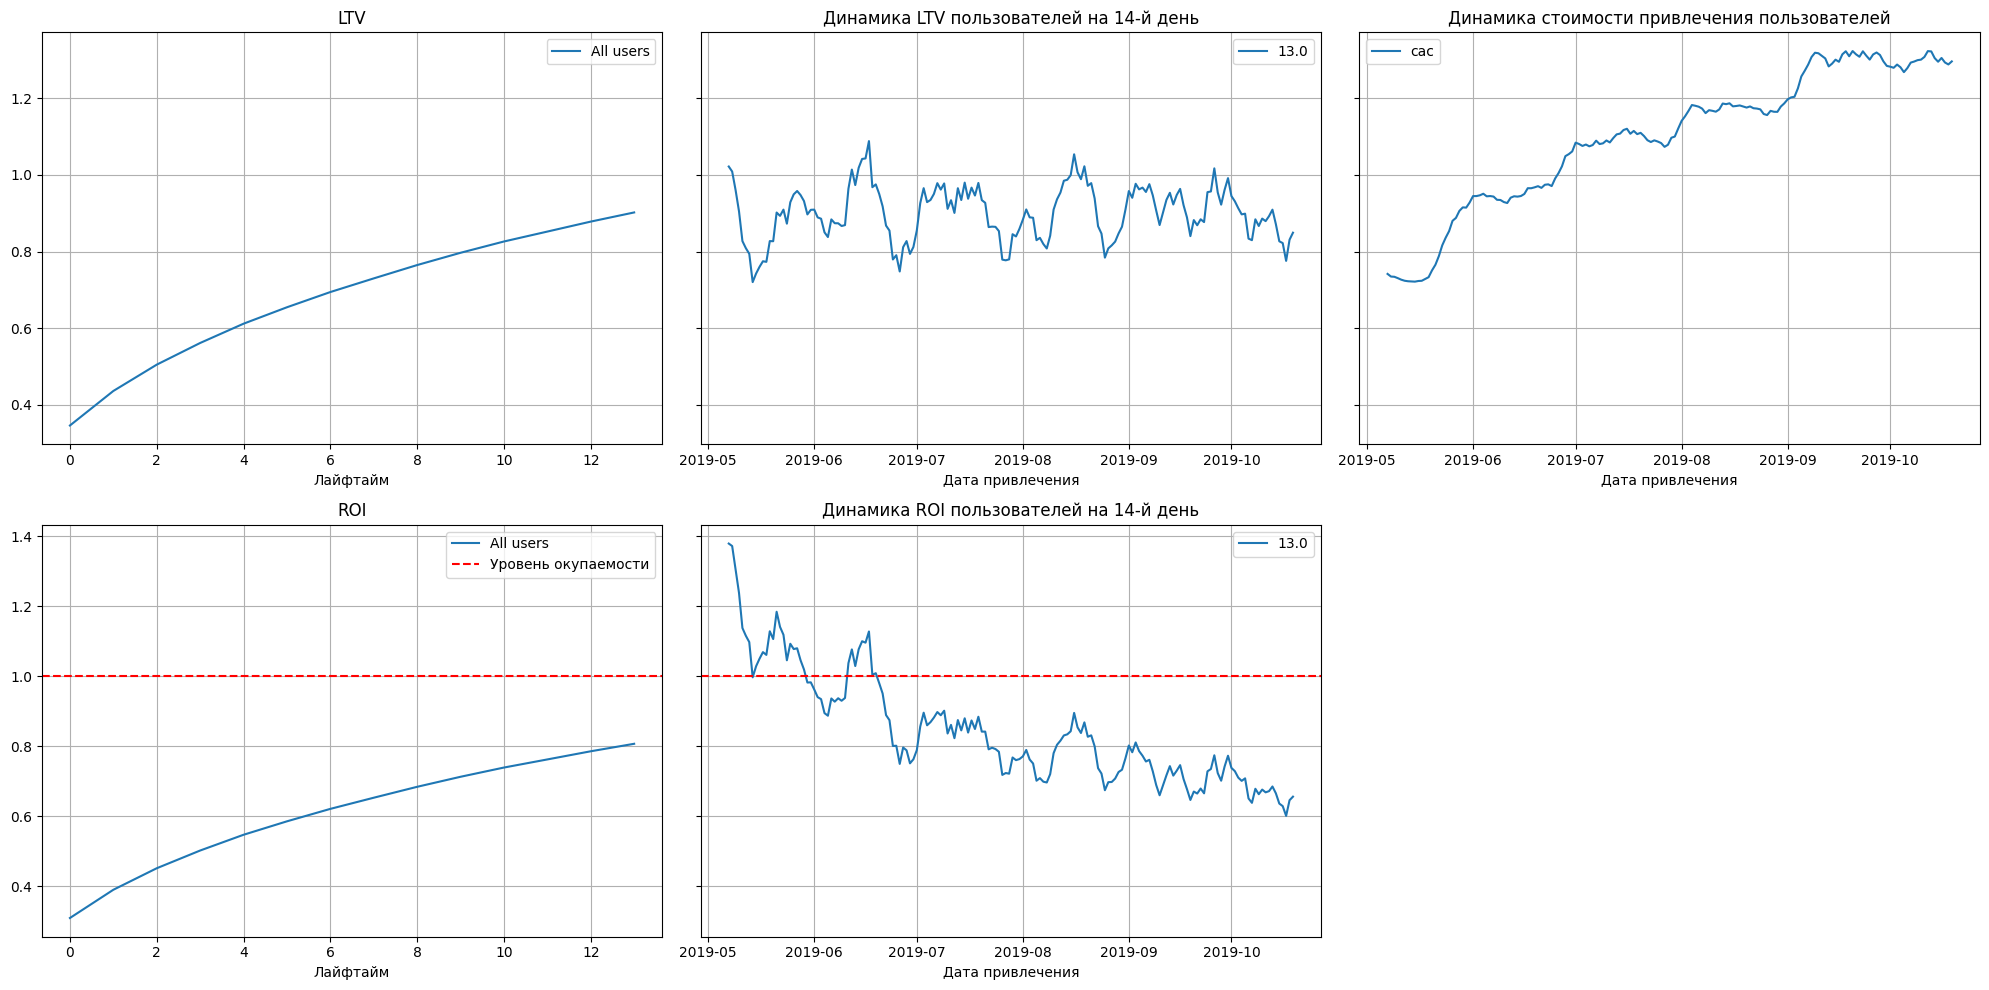

In [32]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


**Проверим конверсию всех пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания**

Для начала изучим конверсию, вызвав функции get_conversion() и plot_conversion()

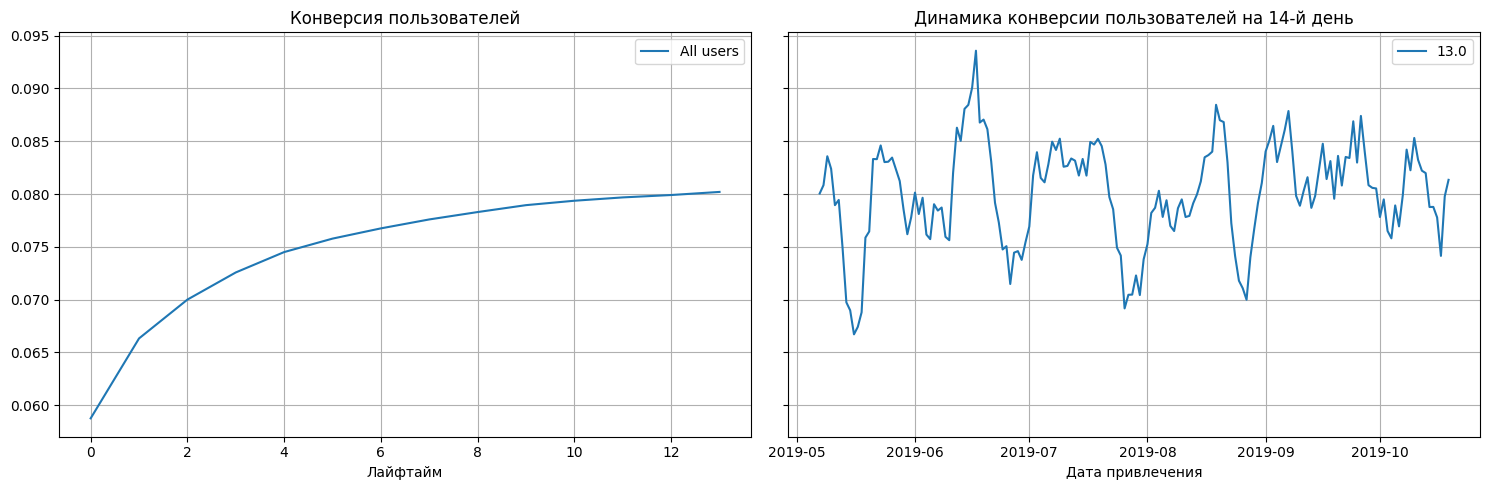

In [33]:
# смотрим графики конверсии для всех  пользователей
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании клиентов. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель

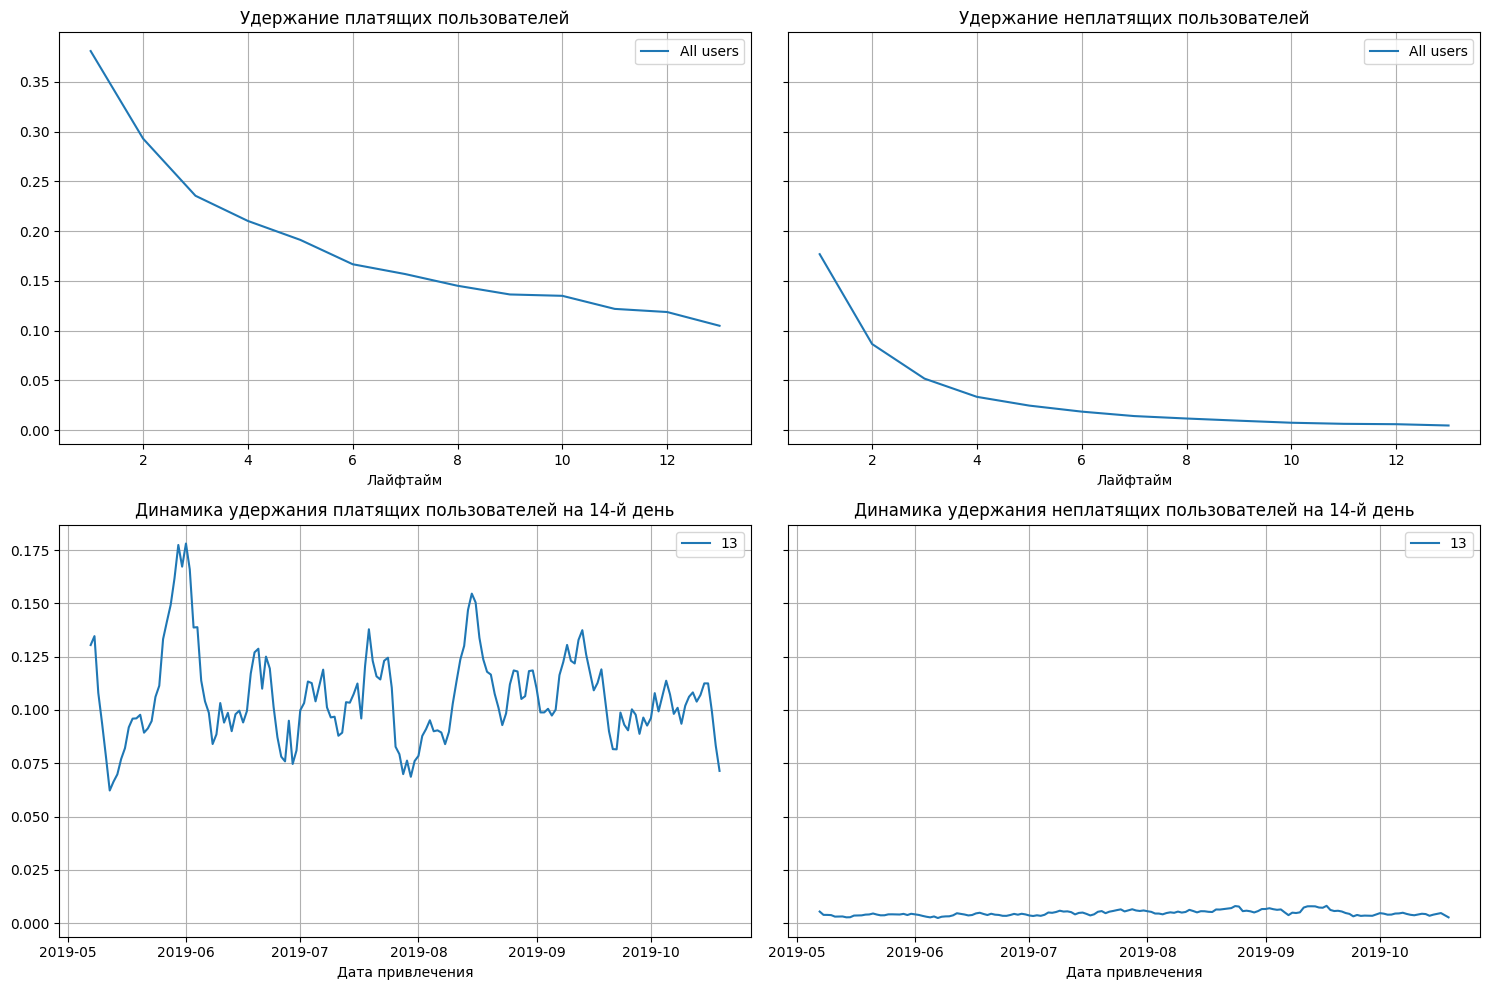

In [34]:
# смотрим графики  удержания всех пользователей с разбивкой на платящих и неплатящих
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам,  отражающим поведение всех пользователей, сожно сделать правильные выводы относительно существующих  проблем с привлечением, окупаемостью и удержанием пользователей. Можно заметить, что неплатящие пользователи хуже удерживаются, чем платящие, однако это стандартная практика.

**Для правильного анализа целесообразно проанализировать окупаемость рекламы с разбивкой по устройствам, странам и каналам привлечения**

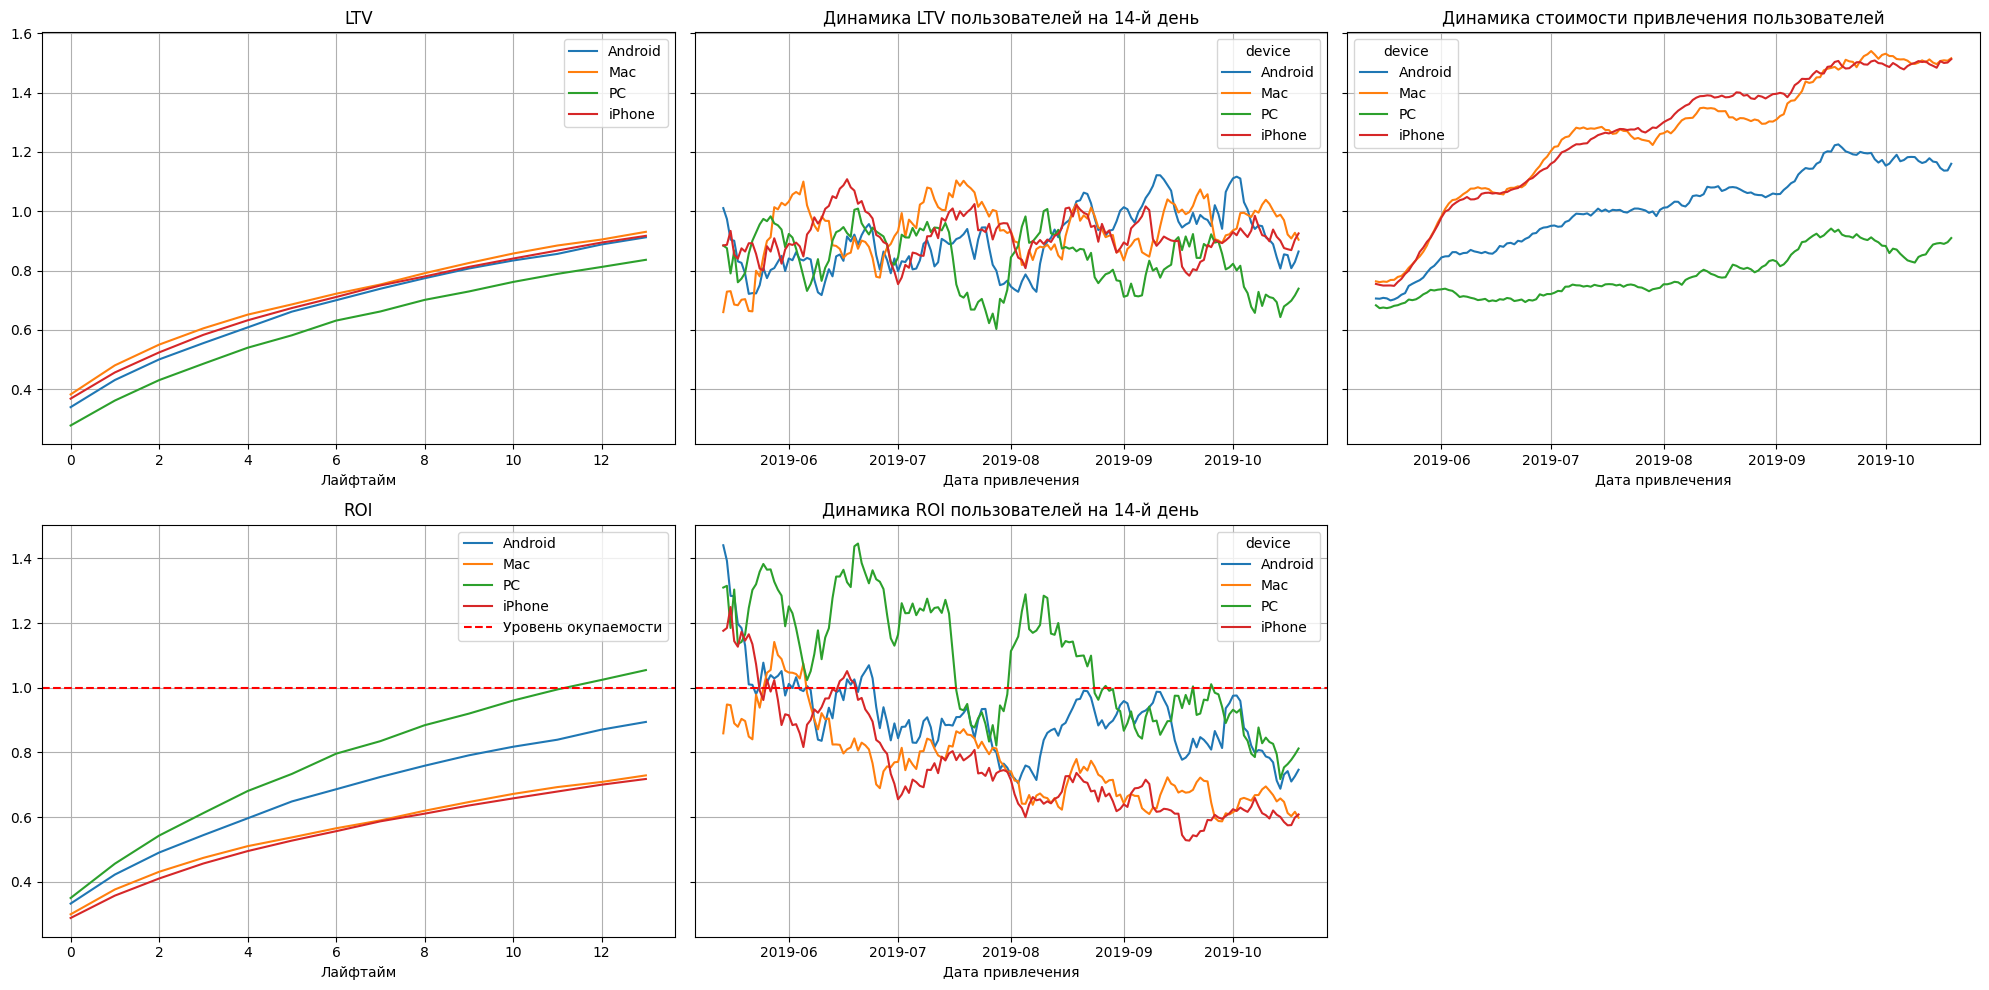

In [35]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По данным графикам можно сделать следующие выводы:
- LTV, или Lifetime Value, «пожизненная ценность» клиента хуже всего у пользователей PC,  в динамике данная метрика примерно одинакова к 14 дню у пользователей всех устройств
- дешевле всего компании обходится привлечение пользователей PC и Android, дороже всего - пользователей Mac и Iphone, затраты на привлечение всех пользователей растут с течением времени, причем для пользователей устройств от компании Apple - более высокими темпами
- Пользователи PC окупаются в среднем на 7-й день. Пользователи Android, Mac и Iphone не окупаются вовсе,  что,  учитывая высокую стоимость их привлечения,  является серьезной проблемой для компании. Также пользователи PC и Android имеют лучшую динамику ROI на 14-й день,  чем пользователи Mac и Iphone

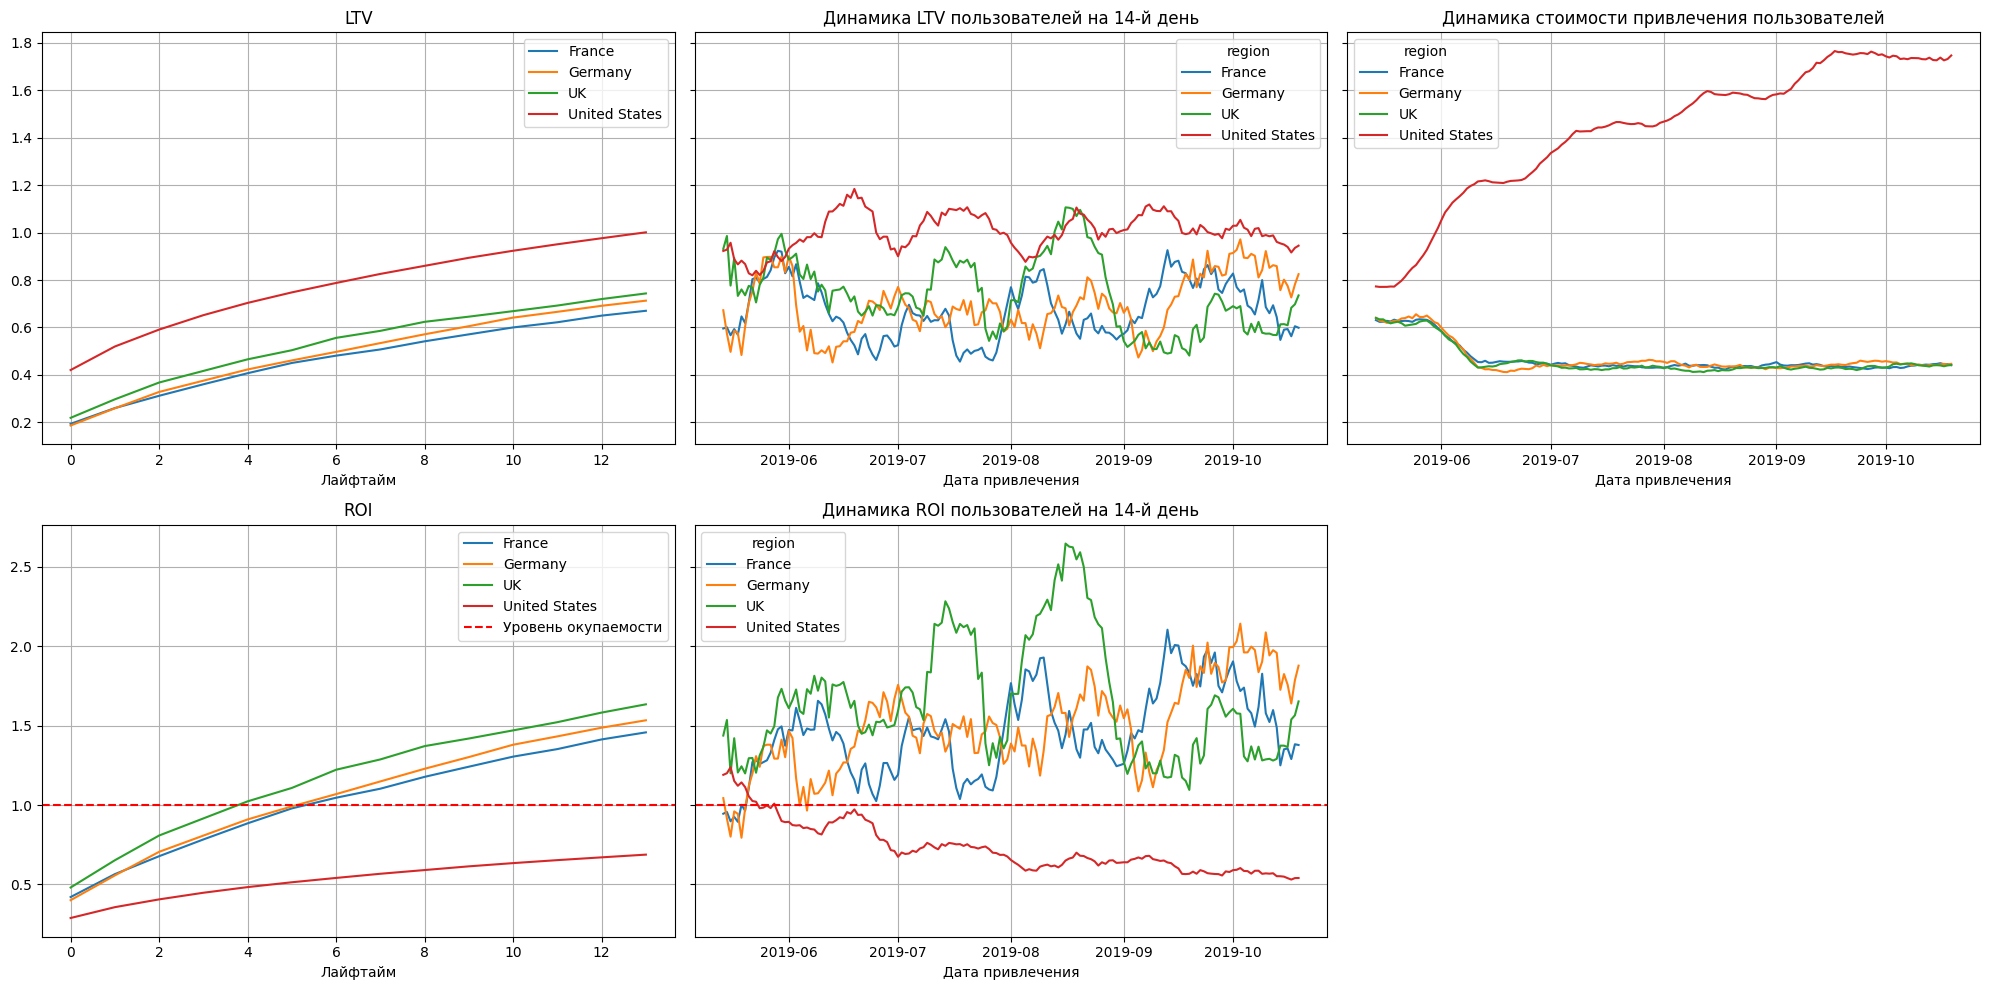

In [36]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По данным графикам можно сделать следующие выводы:

- Самый высокий показатель LTV и лучшую динамику имеют пользователи из  США, однако эти же пользователи имеют самую высокую  стоимость привлечения,  само привлечение этих  пользователей не окупается, также они имеют худшую динамику ROI, что лочично
- Пользователи из  Великобритании и Германии показывают схожие параметры LTV , ROI, а также похожую стоимость привлечения, которая окупается на 2-3 день жизни клиента
- Относительно самые низкие показатели LTV и ROI показывают пользователи из  Франции,  однако стоимость их привлечения такая же,  как и пользователей из Великобритании и Германии,  и привлечение этих пользователей также окупается к 3-4 дню.


**На основании предыдущих выводов можно было бы сделать рекомендацию отказаться от рынка США, однако это регион,  который дает большиство пользователей, поэтому возможно дело не в регионе,  а в рекламных каналах, которые в этом регионе работают. Посмотрим на регион США отдельно от остальных**

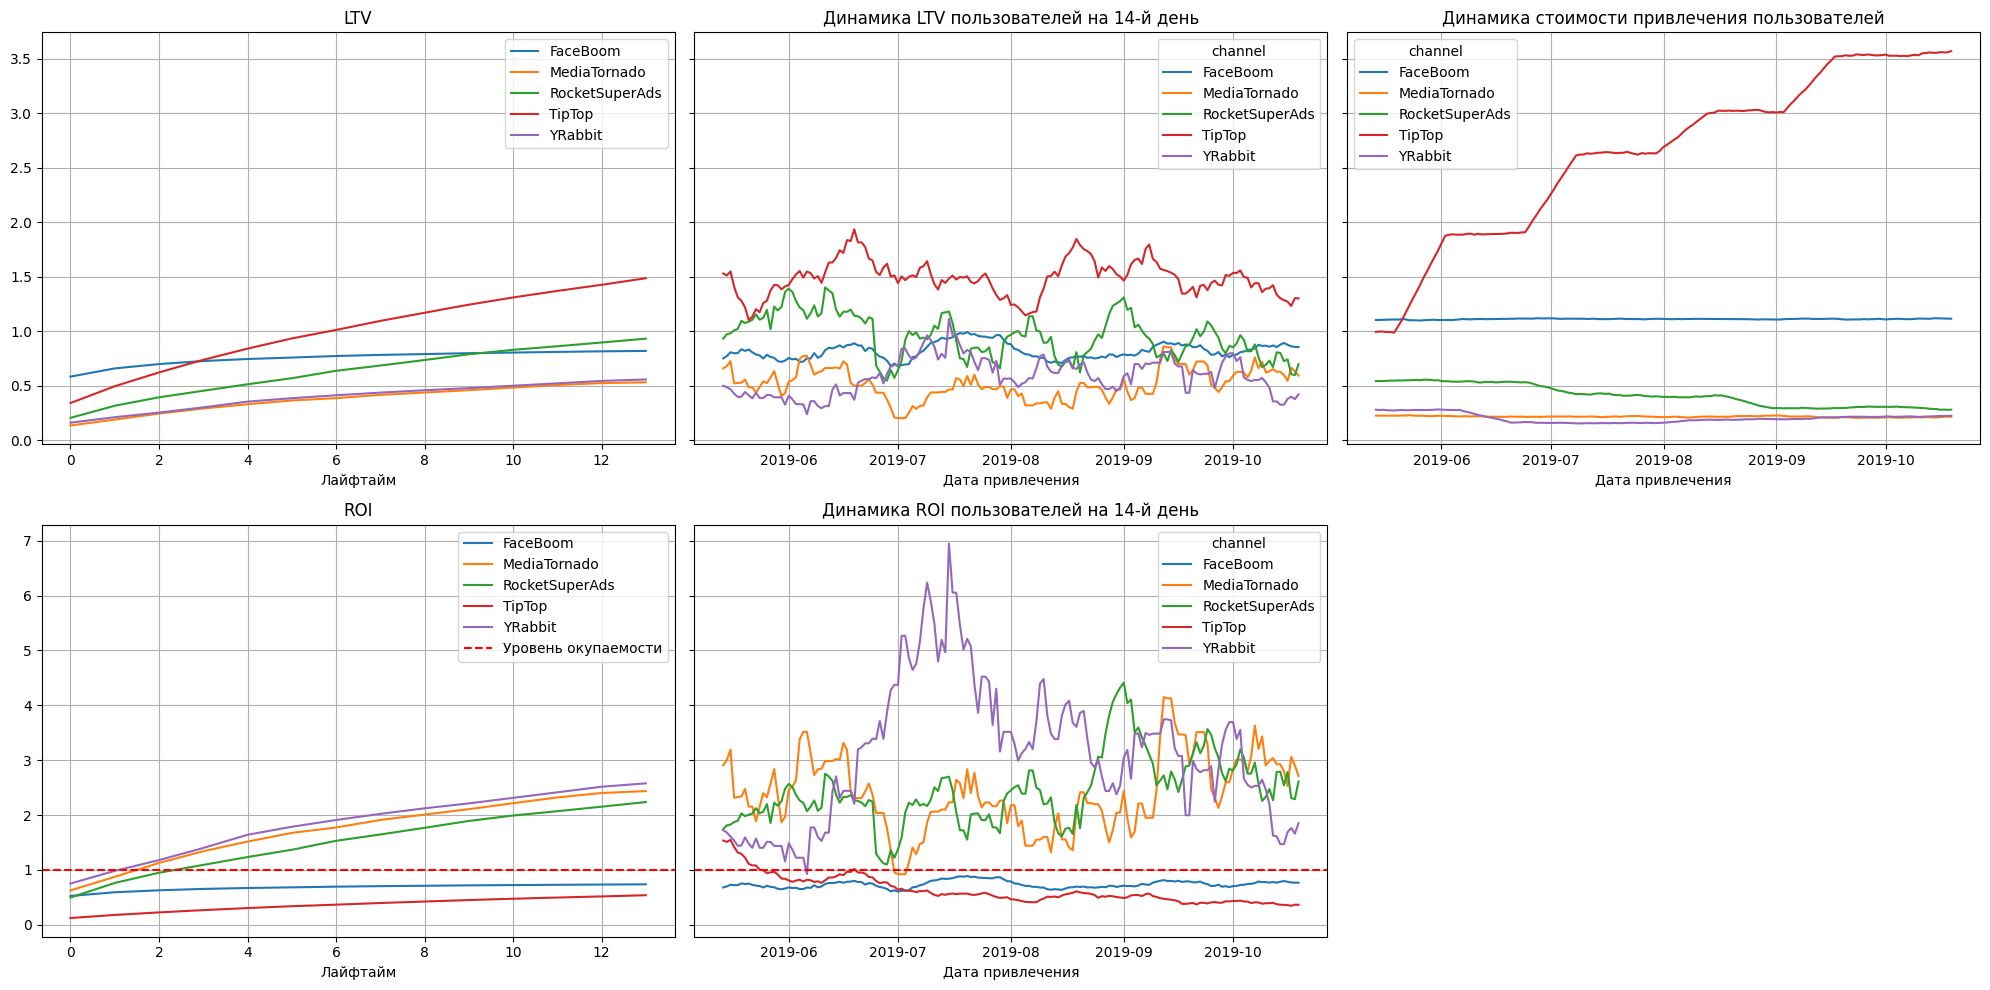

In [37]:
profiles_usa = profiles[(profiles.region == 'United States')]
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


Действительно, в данном регионе действуют 2 рекламных канала,  на который компания тратит больше всего  средств и которые не окупаются, однако остальные 3 канала показывают хорошие результаты, поэтому  возможно,  после перераспределения рекламного бюджета, общая ситуация по региону изменится. Аналочичный вывод  можно сделать относительно устройств, которые "не окупаются".

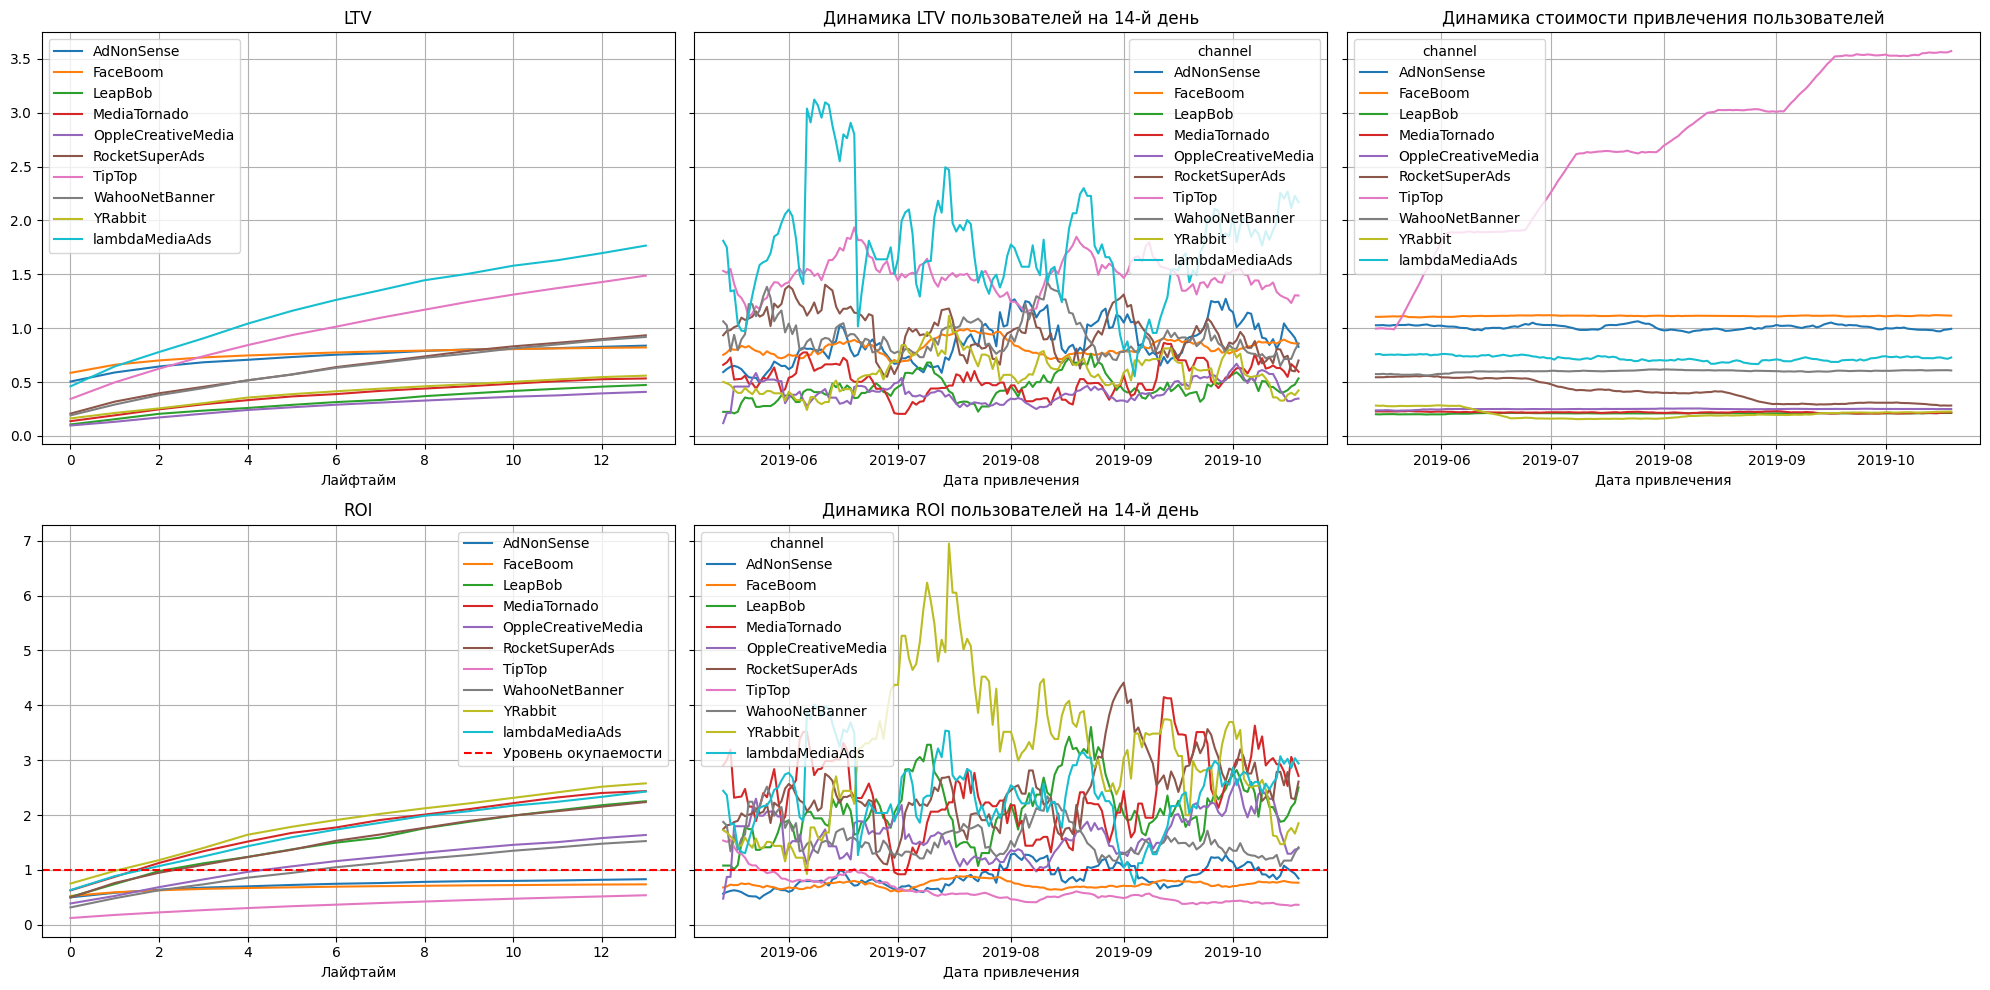

In [38]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Для начала сделаем выводы относительно каналов - лидеров по издержкам:

Каналы Tip Top и Faceboom имеют относительно высокий уровень LTV, однако эти же каналы имеют самую высокую стоимость привлечения , причем стоимость привлечения пользователей через канал Tip Top постоянно растет высокими темпами, но само привлечение пользователей с этих каналов не окупается, также они имеют худшую динамику ROI, что лочично

Теперь посмотрим на те же показатели, но без лидеров по издержкам, так мы получим более масштабную картину происходящего. Передадим функции get_ltv() датафрейм profiles_without_leaders и посмотрим на окупаемость остальных рекламных каналов:

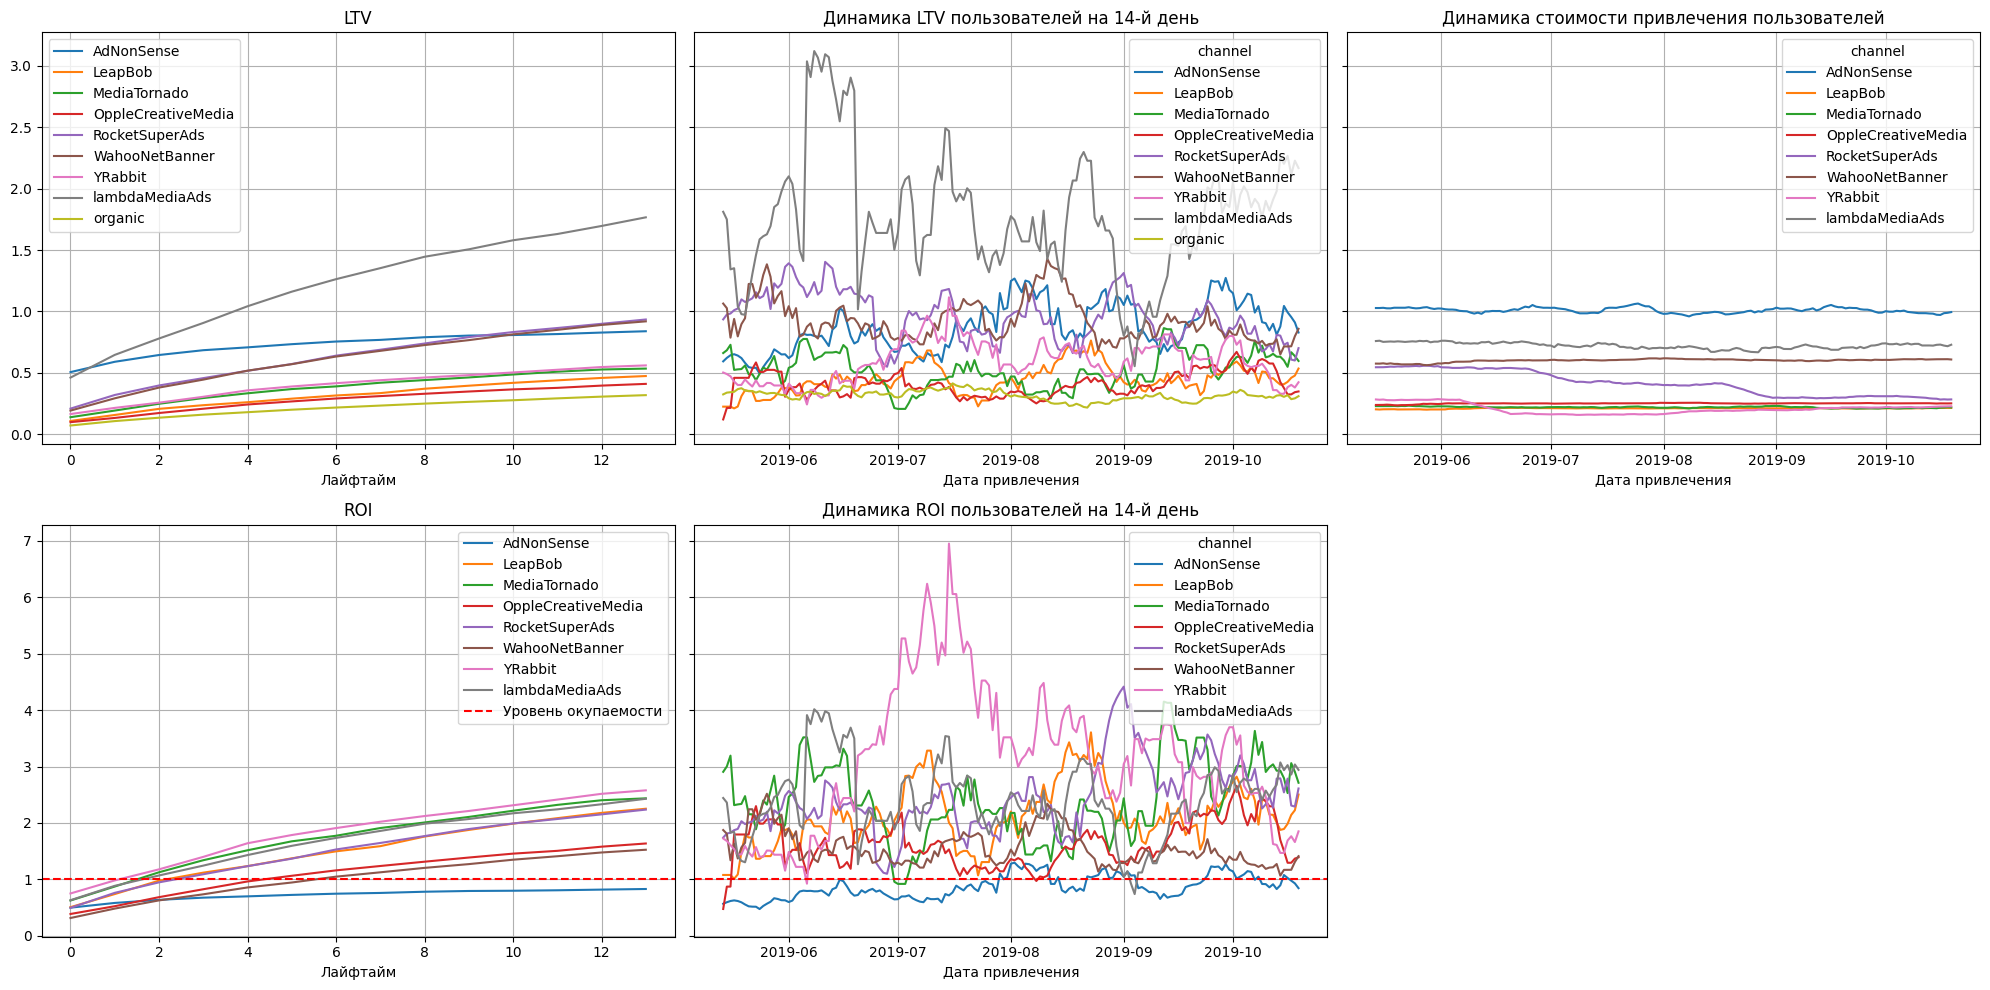

In [39]:
# смотрим окупаемость с разбивкой по рекламным каналам без лидеров по затратам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_leaders, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Самый высокий показатель LTV имеет канал LambdaMediaAds, и, несмотря на то,  что этот канал имеет один самых высоких показателей стоимости привлечения клиентов, эта стоимость окупается в среднем на 2-й день, что является отличным показателем,  также этот канал показывает всплески в динамике LTV,что также можно учесть при планировании рекламного бюджета в будущем 
- Худшим каналом из рассматриваемых является канал AdNonSense  - несмотря на относительно высокий показатель LTV, данный канал имеет самую высокую стоимость привлечения клиентов, которая не окупается.
- Среди оставшихся каналов выделяется канал YRabbit - он имеет хороший показатель LTV, а также относительно низкие затраты на привлечение клиентов,  которые  окупаются на 2-й день. Данный канал имеет всплеск в динамике ROI на 5-6 день, что также можно учесть при планировании рекламного бюджета в будущем
- Остальные каналы имеют схожую положительную статистику - невысокие затраты на привлечение клиентов и хорошие показатели окупаемости вложений.

### Выводы


**Общие выводы**

Целью данного исследования являлся поиск причин убытков деятельсти компании, разработавшей приложение Procrastinate Pro+ в последние месяцы, несмотря на высокие вложения в рекламу.
В исследовании проанализированы данные по пользователям приложения Procrastinate Pro+ из США, Великобритании, Франции и Германии в период  с мая по октябрь 2019года, а также рекламные затраты в этот период.

**Пользователи приложения**

- Больше всего пользователей зарегистрировано в США (100002 чел.), в этой же стране и наибольшее количество (6902 чел.) и доля платящих пользователей (6,9 % от общего числа)
- На втором месте по общему количеству пользователей (17575 чел.) и количеству платящих пользователей (700 чел.) находится Великобритания, однако по доле платящих пользователей она занимает 3-е место с результатом 3,98 %.
- Похожее количество пользователей во Франции (17450 чел.), однако засчет меньшего количества платящих пользователей (663 чел.) их относительная доля составляет 3,8 %, что является худших результатом
- На последнем месте по общему количеству пользователей (14981 чел.) и количеству платящих пользователей (616 чел.) находится Германия, однако по доле платящих пользователей она занимает 2-е место с результатом 4,11 %.
- Пользователи используют 4 типа устройств: iPhone, Android, PC, Mac.
- Большиство платящих пользователей предпочитают устройства компании Aplle - это устройства iPhone (общее количество пользователей 54479 чел и доля платящих 6,21%) и Mac (общее количество пользователей 30042 чел и доля платящих 6,36%), то есть пользователи этих устройств чаще остальных оплачивают подписку приложения Procrastinate Pro+. Владельцы айфонов также являются лидерами по общему количеству пользователей приложения.
- Владельцы Android и PC имеют относительно худшие показатели платежеспособности - при общем поличестве пользователей 35032 чел и 30455 чел они имеют доли платящих клиентов на уровне 5,85% и 5,05% соответсвенно.

**Маркетинговые данные**

Рекламные каналы, которые привлекли большее количество платящих пользователей в абсолютных цифрах. Здесь выделяется ТОП-3 канала:
- FaceBoom - 3557 человек;
- Tip Top - 1878 человек;
- Organic - 1160 человек.

ТОП-7 рекламных каналов, которые лучше себя показали в плане привлечения платежеспособных пользователей относительно общего количества привлеченных пользователей:

- FaceBoom 12.20%
- AdNonSense 11.34%
- lambdaMediaAds 10.47%
- TipTop 9.60%
- RocketSuperAds 7.91%
- WahooNetBanner 5.30%

Больше всего маркетинговых затрат приходится на 2 канала - Tip Top (54751.30 у.е.) и FaceBoom (32445.60) , что в сумме составляет 87196.9 у.е. или 82,65% всего рекламного бюджета. На остальные каналы тратится в разы меньше средств:
расходы на большиство рекламных каналов не превышают 30 долларов в месяц и с течением времени сильно не меняются. Выделяются только каналы AdNonSense (затраты на него снизились с 50 долл. в мае до 35 долл. в октябре) и WahooNetBanner (затраты на него выросли в среднем с 20 долл. в мае до 40 долл. в октябре с пиковыми значениями в июне и сентябре на уровне 50 долл.) 

Большиство рекламных каналов  имеют схожую динамику стоимости привлечения клиентов, то есть стоимость привлечения 1 пользователя колеблется от 0,25 центов до 1,25 центов. Канал RocketSuperAds даже показывает снижение стоимости привлечения с 0,5 доллара в мае до 0,25 доллара в октябре. Однако сильно выделяется канал Tip Top - стоимость привлечения пользователей с канала Tip Top ежемесячно растет от 1 доллара в мае до 3,5 долларов в октябре.

**Выявленные проблемы**

Согласно графикам  LTV, ROI и CAC, построенным по общим данным:
1. Реклама не окупается. ROI пользователей на 14 день  — чуть выше 80%. Динамика ROI имеет тенденцию  к снижению  на 14-й день.
2. CAC нестабилен и постоянно растет.

Согласно графикам  LTV, ROI и CAC разрезе по странам, устройствам и рекламным каналам выявлено:

1. Дешевле всего компании обходится привлечение пользователей PC, чуть дороже -  Android, дороже всего - пользователей Mac и Iphone, затраты на привлечение всех пользователей растут с течением времени, причем для пользователей устройств от компании Apple - более высокими темпами
2. Пользователи PC окупаются в среднем на 7-й день. Пользователи Android, Mac и Iphone не окупаются вовсе,  что,  учитывая высокую стоимость их привлечения,  является серьезной проблемой для компании
3. Самый высокий показатель LTV и лучшую динамику имеют пользователи из США, однако эти же пользователи имеют **самую высокую стоимость привлечения, само привлечение этих пользователей не окупается**, также они имеют худшую динамику ROI, что лочично
4. Каналы Tip Top и Faceboom (лидеры по затратам) имеют относительно высокий уровень LTV, однако эти же каналы имеют **самую высокую стоимость привлечения , причем стоимость привлечения пользователей через канал Tip Top постоянно растет высокими темпами, но само привлечение пользователей с этих каналов не окупается**, также они имеют худшую динамику ROI

**Рекомендации для отдела маркетинга**

1. Исключить из  рекламного бюджета каналы привлечения пользователей, которые не окупаются: Tip Top, FaceBoom, AdNonSense
2. Высвобожденные средства перераспределить на каналы привлечения, которые окупаются : прежде всего, каналы YRabbit и  LambdaMediaAds (хорошие показатель LTV, а также относительно низкие затраты на привлечение клиентов,  которые  окупаются на 2-й день) - 50% рекламного бюджета, остальной бюджет - равными долями распределить на остальные рекламные каналы: WahooNetBanner, OppleCreativeMedia, RocketSuperAds, LeapBob, lambdaMediaAds, MediaTornado
3. После этого провести повторное исследование показателей и графиков LTV, ROI и CAC разрезе по странам, устройствам и рекламным каналам, например, через месяц,  и скорректировать выводы и рекомендации
